## Convocatoria 1 - Proyecto 2

### Ejercicio 1 (5 puntos)
Utilizar el conjunto de datos "dataset_1.npy" para resolver el ejercicio. Tener en cuenta que la última columna corresponde a la clase.

#### 1.a) Imputación de valores ausentes (2.5 puntos)

- En aquellas instancias (filas) que contengan UN ÚNICO VALOR NaN en alguno de sus atributos (columnas), se imputará dicho valor.
 * Si el atributo corresponde a una variable discreta, se imputará el valor utilizando la moda de dicho atributo. 
 * Si el atributo corresponde a una variable continua, se imputará el valor utilizando la media de dicho atributo. 
- Aquellas instancias (filas) que contengan MÁS DE UN VALOR NaN en sus atributos, deberán ser eliminadas por completo. 

Los outputs deberán ser: 
- Una matriz "X" de dimensiones M x N, donde M será el número de instancias y N, el de atributos.
- Un vector "y" de dimensiones M.

Nota: Se valorará positivamente la automatización del código. Hay que evitar procesos manuales en la medida de lo posible.

In [5]:
import numpy as np
import pandas as pd
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest

In [6]:
# EJERCICIO 1 APARTADO A:

def eliminar_NaN_multiples(df):
    # Usamos esta condición para encontrar aquellas filas del dataframe que contienen más un valor NaN.
    mask = df.isnull().sum(axis=1) > 1

    # Eliminamos completamente dichas filas:

    df.drop(df[mask].index, inplace = True)
    print('\nDataframe con valores NaN múltiples eliminados: ')
    display(df)
    return df

def sustituir_NaN_unicos(df):
    #Procedemos a obtener cuáles son las columnas con variables discretas y continuas,
    # para saber si sustituir sus valores NaN por la media o la moda, como pide el enunciado:

    c_discreta = []
    c_cont = []
    for i in df.columns:
        if str(df[i][0])[::-1].find('.') == 1:
            c_discreta.append(i)
        
        elif str(df[i][0])[::-1].find('.') > 1:
            c_cont.append(i)
    listacolumnas = list(df.columns)    
    print("\nLa lista total de columnas es: ", listacolumnas)
    print("\nLa lista de columnas con variables discretas son: ", c_discreta)
    print("\nLa lista de columnas con variables continuas son: ", c_cont)

    # Contamos cuántos valores NaN hay por columna en el dataset (después de haber eliminado las filas con más de uno).
    print("\nLos valores NaN por columna son: ")
    print(df.isnull().sum())


    for c in listacolumnas:
        if c in c_discreta:
            print("\nColumna " + c + " (discreta): " + "sustituimos los valores NaN por la moda " + str(df[c].mode()[0]))
            df[c].fillna(df[c].mode()[0], inplace=True)
        elif c in c_cont:
            print("\nColumna " + c + " (continua): " + "sustituimos los valores NaN por la media " + str(round(df[c].mean(),6)))
            df[c].fillna(round(df[c].mean(),6), inplace=True)
    print('\nDataframe con valores NaN únicos eliminados: ')
    display(df)
    return df

##########################################################################################
archivo = np.load('dataset_1.npy')
print(archivo)
# Transformamos el archivo en un dataframe para una mejor comprensión.
df = pd.DataFrame(archivo, columns = list("abcdefghi"))
display(df)

# Primero, eliminamos aquellas filas que contienen más un valor NaN:
eliminar_NaN_multiples(df)

print("\nComo podemos observar, el dataframe pasa de 500 a 495 filas, ya que elimina aquellas en las que hay más de un valor NaN.")
print(" ")

# En segundo lugar, transformamos los NaN que quedan en la media o la moda dependiendo de la columna:
sustituir_NaN_unicos(df)

# Comprobamos que, efectivamente, ya no quedan valores NaN en ninguna columna:
print("\nAhora, los valores NaN por columna son los siguientes: ")
print(df.isnull().sum())

[[ 0.          4.          1.         ...  8.2603626   7.37490176
   0.        ]
 [ 0.          4.          0.         ... 10.9370737  10.30131004
   0.        ]
 [ 0.          3.          1.         ... 10.69134847 11.45671439
   0.        ]
 ...
 [ 0.          2.          0.         ...  1.94458971  8.88390924
   0.        ]
 [ 0.          3.          2.         ...  1.92895933  9.03304966
   1.        ]
 [ 0.          4.          0.         ...  2.0478487   8.86096477
   0.        ]]


,a,b,c,d,e,f,g,h,i
0,0.0,4.0,1.0,4.0,2.0,9.044810,8.260363,7.374902,0.0
1,0.0,4.0,0.0,6.0,1.0,8.569082,10.937074,10.301310,0.0
2,0.0,3.0,1.0,1.0,5.0,9.687778,10.691348,11.456714,0.0
3,0.0,2.0,1.0,5.0,1.0,12.057221,10.286357,10.575028,0.0
4,0.0,2.0,2.0,3.0,2.0,9.732969,9.447140,9.383029,0.0
...,...,...,...,...,...,...,...,...,...
495,0.0,1.0,0.0,3.0,4.0,3.114222,1.903256,8.995061,0.0
496,1.0,1.0,2.0,4.0,1.0,3.032017,2.305869,9.185725,1.0
497,0.0,2.0,0.0,4.0,3.0,2.958827,1.944590,8.883909,0.0
498,0.0,3.0,2.0,5.0,0.0,2.955424,1.928959,9.033050,1.0



Dataframe con valores NaN múltiples eliminados: 


,a,b,c,d,e,f,g,h,i
0,0.0,4.0,1.0,4.0,2.0,9.044810,8.260363,7.374902,0.0
1,0.0,4.0,0.0,6.0,1.0,8.569082,10.937074,10.301310,0.0
2,0.0,3.0,1.0,1.0,5.0,9.687778,10.691348,11.456714,0.0
3,0.0,2.0,1.0,5.0,1.0,12.057221,10.286357,10.575028,0.0
4,0.0,2.0,2.0,3.0,2.0,9.732969,9.447140,9.383029,0.0
...,...,...,...,...,...,...,...,...,...
495,0.0,1.0,0.0,3.0,4.0,3.114222,1.903256,8.995061,0.0
496,1.0,1.0,2.0,4.0,1.0,3.032017,2.305869,9.185725,1.0
497,0.0,2.0,0.0,4.0,3.0,2.958827,1.944590,8.883909,0.0
498,0.0,3.0,2.0,5.0,0.0,2.955424,1.928959,9.033050,1.0



Como podemos observar, el dataframe pasa de 500 a 495 filas, ya que elimina aquellas en las que hay más de un valor NaN.
 

La lista total de columnas es:  ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i']

La lista de columnas con variables discretas son:  ['a', 'b', 'c', 'd', 'e', 'i']

La lista de columnas con variables continuas son:  ['f', 'g', 'h']

Los valores NaN por columna son: 
a    1
b    0
c    0
d    0
e    0
f    2
g    0
h    0
i    0
dtype: int64

Columna a (discreta): sustituimos los valores NaN por la moda 0.0

Columna b (discreta): sustituimos los valores NaN por la moda 2.0

Columna c (discreta): sustituimos los valores NaN por la moda 1.0

Columna d (discreta): sustituimos los valores NaN por la moda 3.0

Columna e (discreta): sustituimos los valores NaN por la moda 2.0

Columna f (continua): sustituimos los valores NaN por la media 8.516558

Columna g (continua): sustituimos los valores NaN por la media 8.327118

Columna h (continua): sustituimos los valores NaN por

,a,b,c,d,e,f,g,h,i
0,0.0,4.0,1.0,4.0,2.0,9.044810,8.260363,7.374902,0.0
1,0.0,4.0,0.0,6.0,1.0,8.569082,10.937074,10.301310,0.0
2,0.0,3.0,1.0,1.0,5.0,9.687778,10.691348,11.456714,0.0
3,0.0,2.0,1.0,5.0,1.0,12.057221,10.286357,10.575028,0.0
4,0.0,2.0,2.0,3.0,2.0,9.732969,9.447140,9.383029,0.0
...,...,...,...,...,...,...,...,...,...
495,0.0,1.0,0.0,3.0,4.0,3.114222,1.903256,8.995061,0.0
496,1.0,1.0,2.0,4.0,1.0,3.032017,2.305869,9.185725,1.0
497,0.0,2.0,0.0,4.0,3.0,2.958827,1.944590,8.883909,0.0
498,0.0,3.0,2.0,5.0,0.0,2.955424,1.928959,9.033050,1.0



Ahora, los valores NaN por columna son los siguientes: 
a    0
b    0
c    0
d    0
e    0
f    0
g    0
h    0
i    0
dtype: int64


#### 1.b) Eliminación de valores outliers (2.5 puntos)
- Extraer la posición de los posibles outliers presentes en el dataset anterior tras la imputación de valores ausentes,
  utilizando los métodos de Elliptic Envelope y de Isolation Forest. 
  * En EE, utilizar los parámetros "support_fraction=1" y "contamination=0.05".
  * En IF, utilizar los parámetros "n_estimators=100" y "contamination=0.05".
- Se debe encontrar la posición de los outliers que han sido detectados por ambos métodos
- Finalmente, obtener una matriz donde se hayan eliminado los outliers detectados en el paso anterior.
- Sacar por pantalla las dimensiones de la nueva matriz de datos sin outliers. 

In [7]:
# EJERCICIO 1 APARTADO B:
def find_outliers(df, algorithm):
    # Entrenamos el algoritmo
    outlier_method = algorithm.fit(df)
    
    # Aplicamos el método de detección de outliers entrenado sobre nuesto dataset
    df_outliers = outlier_method.predict(df)
    print(df_outliers)

    # Determinar la posición de los outliers
    pos_outliers = np.where(df_outliers==-1)[0]
    print('\nOutliers en la posición: \n', pos_outliers)

    # Determinar el número de outliers
    print('\nNúmero de outliers: \n', len(pos_outliers))
    
    return df_outliers, pos_outliers



# Definimos los algoritmos EllipticEnvelope e Isolation Forest 
ellipticE = EllipticEnvelope(support_fraction=1, contamination=0.05, random_state=42)
isolationF = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)

print("ELLIPTIC ENVELOPE")
print("")
df_outliers_ellipticE, pos_outliers_ellipticE = find_outliers(df, ellipticE)
print("")
print("")
print("ISOLATION FOREST")
print("")
df_outliers_isolationF, pos_outliers_isolationF = find_outliers(df, isolationF)

print("")
print("")
print("")
outliers_def = []
for i in pos_outliers_ellipticE:
    if i in pos_outliers_isolationF:
        outliers_def.append(i)
    else:
        pass
    

print("Los outliers que coinciden en ambos métodos son ", outliers_def)
print("")
print("")
print("")

# Eliminamos los outliers
new_df=df.drop(df.index[outliers_def])
display(new_df)
print("Vemos que el número de filas se ha reducido de 495 a 483, es decir, hemos eliminado las 17 filas que ")
print("contenían los outliers")

ELLIPTIC ENVELOPE

[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  

,a,b,c,d,e,f,g,h,i
0,0.0,4.0,1.0,4.0,2.0,9.044810,8.260363,7.374902,0.0
1,0.0,4.0,0.0,6.0,1.0,8.569082,10.937074,10.301310,0.0
2,0.0,3.0,1.0,1.0,5.0,9.687778,10.691348,11.456714,0.0
3,0.0,2.0,1.0,5.0,1.0,12.057221,10.286357,10.575028,0.0
4,0.0,2.0,2.0,3.0,2.0,9.732969,9.447140,9.383029,0.0
...,...,...,...,...,...,...,...,...,...
495,0.0,1.0,0.0,3.0,4.0,3.114222,1.903256,8.995061,0.0
496,1.0,1.0,2.0,4.0,1.0,3.032017,2.305869,9.185725,1.0
497,0.0,2.0,0.0,4.0,3.0,2.958827,1.944590,8.883909,0.0
498,0.0,3.0,2.0,5.0,0.0,2.955424,1.928959,9.033050,1.0


Vemos que el número de filas se ha reducido de 495 a 483, es decir, hemos eliminado las 17 filas que 
contenían los outliers


### Ejercicio 2 (5 puntos)

Crear un programa, con comentarios que aclaren el código, donde se computen las métricas MAE, MSE, RMSE, MAPE y R2 aplicando los regresores OLS y KNN en un dataset de regresión (a elegir). Nota: No se pueden utilzar datasets de la librería de scikit-learn.

Se debe llevar a cabo:
- Exploración de los datos y descripción del dataset
- Tratamiento de outliers y valores perdidos (si los hay)
- Partición externa de datos
- Estandarización de los datos
- Selección de atributos mediante métodos supervisados (solo uno)
- Validación cruzada interna para optimizar los hiperparámetros de los algoritmos (si procede)
- Modelado
- Predicción y evaluación sobre el conjunto de test (resultados cuantitativos y cualitativos)
- Breve discusión comparando los resultados obtenidos con cada método.

### Exploración de los datos y descripción del dataset

**DATASET PARA LA PREDICCIÓN DE LA COMPRA DE UN AUTOMÓVIL NUEVO**

Para la mayoría de las personas, la compra de un coche (especialmente un coche nuevo) es la segunda compra más cara que harán en su vida (la compra de una casa suele ser la más cara).

En la compra de un vehículo intervienen muchos factores: el tipo de coche, si se trata de una nueva gama o una más antigua, si es de primera mano o no, etc. Pero, al final del día, lo más importante es el poder adquisitivo de la persona que quiere comprar el coche. Por ello, en la siguiente actividad realizamos un análisis de un dataset que recoge información relacionada con varios aspectos de la economía de una muestra de personas con el objetivo de poder predecir la cantidad total que los clientes estan dispuestos a pagar por un coche nuevo.

Para ello, en dataset utilizado vamos a tener las siguientes variables:

* **Nombre Cliente**
Variable de tipo String

* **E-mail del cliente**
Variable de tipo String

* **País**
Variable de tipo String. Tiene un único valor: USA.

* **Género**
Variable binaria (discreta): puede ser 1 (masculino) ó 0 (femenino).

* **Salario Anual**
Variable continua que indica cuánto gana cada año la persona de dicha instancia (en dólares).

* **Deuda de la tarjeta de crédito**
Variable continua que indica la deuda/préstamo que posee un cliente en su tarjeta (en dólares).

* **Patrimonio neto**
Cantidad total de dinero que posee la persona de dicha instancia (en dólares)

* **Importe de la compra del coche**
Variable de predicción (objetivo deseado, target)


Las tres primeras variables no tendrán ninguna utilidad para realizar el análisis, debido a que el nombre y el email son datos personales que no aportan nada en este estudio, mientras que la variable de país tiene un valor único, por ello tras la carga de datos no las usaremos.


In [8]:
import pandas as pd
import numpy as np
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_predict, cross_val_score, cross_validate, train_test_split, KFold
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsRegressor
from sklearn import linear_model, metrics
from pprint import pprint
from math import sqrt
import matplotlib.pyplot as plt
from sklearn.feature_selection import f_regression, mutual_info_regression 

In [9]:
# Carga de datos
datos = pd.read_csv("Car_Purchasing_Data.csv")
datos = datos.iloc[:,3:]

# Visualizamos algunas muestras
datos.head()

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,0,42.0,62812.09301,11609.380910,238961.2505,35321.45877
1,0,41.0,66646.89292,9572.957136,530973.9078,45115.52566
2,1,43.0,53798.55112,11160.355060,638467.1773,42925.70921
3,1,58.0,79370.03798,14426.164850,548599.0524,67422.36313
4,1,57.0,59729.15130,5358.712177,560304.0671,55915.46248


In [10]:
# Obtenemos información del dataset para comprobar si hay valores nulos
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gender               500 non-null    int64  
 1   Age                  490 non-null    float64
 2   Annual Salary        491 non-null    float64
 3   Credit Card Debt     491 non-null    float64
 4   Net Worth            486 non-null    float64
 5   Car Purchase Amount  500 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 23.6 KB


In [11]:
# Tratamiento de outliers y valores perdidos.
# APLICAR LA LIMPIEZA DEL DATASET DEL EJERCICIO 1 (en datos)

# Se comprueba cuantos valores nulos hay
# Se procede a eliminarlos
datos_sin_Nan = eliminar_NaN_multiples(datos)
datos_sin_Nan = sustituir_NaN_unicos(datos_sin_Nan)

# Se comprueban los outliers que hay
# Decidimos usar Isolation Forest uno de los algoritmos del ejercicio 1
datos_outliers, pos_outliers = find_outliers(datos_sin_Nan, isolationF)

# Eliminamos los outliers
datos_final = datos_sin_Nan.drop(datos_sin_Nan.index[pos_outliers])
print('\nDataframe limpio sin valores Nan ni outliers: ')
#datos_final = datos_sin_Nan
display(datos_final)



Dataframe con valores NaN múltiples eliminados: 


,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,0,42.0,62812.09301,11609.380910,238961.2505,35321.45877
1,0,41.0,66646.89292,9572.957136,530973.9078,45115.52566
2,1,43.0,53798.55112,11160.355060,638467.1773,42925.70921
3,1,58.0,79370.03798,14426.164850,548599.0524,67422.36313
4,1,57.0,59729.15130,5358.712177,560304.0671,55915.46248
...,...,...,...,...,...,...
495,0,41.0,71942.40291,6995.902524,541670.1016,48901.44342
496,1,38.0,56039.49793,12301.456790,360419.0988,31491.41457
497,1,54.0,68888.77805,10611.606860,764531.3203,64147.28888
498,1,59.0,49811.99062,14013.034510,NaN,45442.15353



La lista total de columnas es:  ['Gender', 'Age', 'Annual Salary', 'Credit Card Debt', 'Net Worth', 'Car Purchase Amount']

La lista de columnas con variables discretas son:  ['Age']

La lista de columnas con variables continuas son:  ['Annual Salary', 'Credit Card Debt', 'Net Worth', 'Car Purchase Amount']

Los valores NaN por columna son: 
Gender                 0
Age                    3
Annual Salary          1
Credit Card Debt       4
Net Worth              6
Car Purchase Amount    0
dtype: int64

Columna Age (discreta): sustituimos los valores NaN por la moda 43.0

Columna Annual Salary (continua): sustituimos los valores NaN por la media 62045.372116

Columna Credit Card Debt (continua): sustituimos los valores NaN por la media 9602.544874

Columna Net Worth (continua): sustituimos los valores NaN por la media 432819.786675

Columna Car Purchase Amount (continua): sustituimos los valores NaN por la media 44156.725973

Dataframe con valores NaN únicos eliminados: 


,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,0,42.0,62812.09301,11609.380910,238961.250500,35321.45877
1,0,41.0,66646.89292,9572.957136,530973.907800,45115.52566
2,1,43.0,53798.55112,11160.355060,638467.177300,42925.70921
3,1,58.0,79370.03798,14426.164850,548599.052400,67422.36313
4,1,57.0,59729.15130,5358.712177,560304.067100,55915.46248
...,...,...,...,...,...,...
495,0,41.0,71942.40291,6995.902524,541670.101600,48901.44342
496,1,38.0,56039.49793,12301.456790,360419.098800,31491.41457
497,1,54.0,68888.77805,10611.606860,764531.320300,64147.28888
498,1,59.0,49811.99062,14013.034510,432819.786675,45442.15353


[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1 -1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1 -1 -1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1 -1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1 -1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1 -1  1  1  1  1  1  1  1  1
  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,0,42.0,62812.09301,11609.380910,238961.250500,35321.45877
1,0,41.0,66646.89292,9572.957136,530973.907800,45115.52566
2,1,43.0,53798.55112,11160.355060,638467.177300,42925.70921
3,1,58.0,79370.03798,14426.164850,548599.052400,67422.36313
4,1,57.0,59729.15130,5358.712177,560304.067100,55915.46248
...,...,...,...,...,...,...
495,0,41.0,71942.40291,6995.902524,541670.101600,48901.44342
496,1,38.0,56039.49793,12301.456790,360419.098800,31491.41457
497,1,54.0,68888.77805,10611.606860,764531.320300,64147.28888
498,1,59.0,49811.99062,14013.034510,432819.786675,45442.15353


In [12]:
# Obtenemos nuestro 'data'.
X = datos_final.drop("Car Purchase Amount", axis=1)
#print(X)

# Obtenemos nuestro 'target', que es la columna que corresponde al riesgo en 10 años de enfermedad coronaria CHD.
y = datos_final["Car Purchase Amount"]
#print(y)

print(f'La dimensión de X es: {np.shape(X)}')
print(f'La dimensión de y es: {np.shape(y)}')

La dimensión de X es: (461, 5)
La dimensión de y es: (461,)


In [13]:
# Definir las Métricas de evaluación. MAE, MSE, RMSE, MAPE y R2.
metricas = {
  'MAE': 'neg_mean_absolute_error',
  'MSE': 'neg_mean_squared_error',
  'RMSE': make_scorer(lambda y, y_pred:
                      sqrt(metrics.mean_squared_error(y, y_pred)),
                      greater_is_better=False),
  'MAPE': make_scorer(lambda y, y_pred:
                      np.mean(np.abs((y - y_pred) / y)) * 100,
                      greater_is_better=False),
  'R2':   'r2',} # R2 es el coeficiente de determinacion

###  1) PARTICIÓN EXTERNA DE DATOS

In [14]:
# 1) Partición externa de datos
X_training, X_testing, y_training, y_testing = train_test_split(X, y, test_size=0.2, random_state=42)
print(f'Dimensiones de X_training: {np.shape(X_training)}')
print(f'Dimensiones de X-testing: {np.shape(X_testing)}')

Dimensiones de X_training: (368, 5)
Dimensiones de X-testing: (93, 5)


### 2-4) PREPARACIÓN PREVIA AL MODELADO

In [15]:
# 2) Extracción de características (Esto se aplica en imagen)

['Gender' 'Age' 'Annual Salary' 'Credit Card Debt' 'Net Worth']


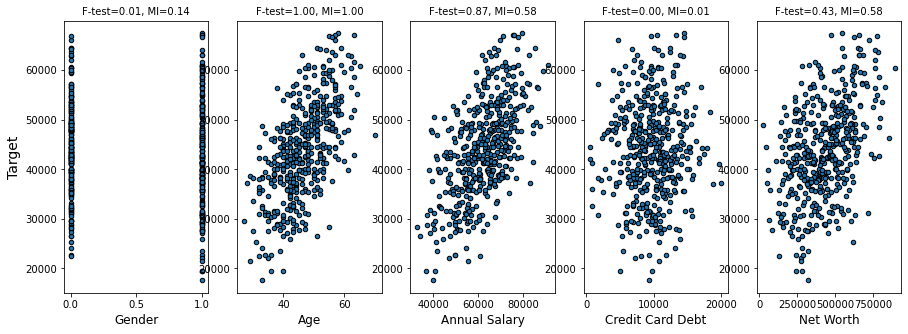

In [16]:
# 3) Selección de atributos mediante métodos supervisados (solo uno)

# La métrica F-test mide el grado de dependencia lineal entre dos atributos y es útil para detectar atributos 
# correlacionados linealmente. La métrica de información mutua mide cualquier tipo de dependencia
# estadística, lineal o no lineal, pero necesita un número mayor de instancias para que sus resultados sean fiables

# Evaluación de atributos: F-Test.
f_test, _ = f_regression(X, y) # Llamamos al estadístico F
f_test /= np.max(f_test) # Normalizamos

# Evaluación de atributos: información mutua.
mi = mutual_info_regression(X, y)
mi /= np.max(mi)

# Graficamos la distribución de los datos y evaluación de atributos.
num_atributos = np.shape(X)[1]
nombres_atributos = X.columns.values
print(nombres_atributos)
plt.figure(figsize=(15, 5))
for i in range(num_atributos):
    plt.subplot(1, num_atributos, i + 1)
    plt.scatter(X.iloc[:,i], y, edgecolor='black', s=20)
    plt.xlabel(nombres_atributos[i], fontsize=12)
    if i == 0:
        plt.ylabel("Target", fontsize=14)
    plt.title("F-test={:.2f}, MI={:.2f}".format(f_test[i], mi[i]), fontsize=10)
plt.show()

Tras las gráficas obtenidas en el paso anterior, nos damos cuenta de lo siguiente:

* **Gender** y **Credit Card Debt** no tienen la suficiente influencia sobre la variable predicción (target) como para tenerlas en cuenta en nuestro análisis ya que no poseen dependencia lineal. 
* A diferencia de las otras variables, **Age**, **Annual Salary** y **Net Worth** que tienen una gran influencia con respecto a la variable target.

Por ello, a partir de ahora seleccionaremos solo las tres últimas.

In [17]:
# Nos quedamos solo con los atributos que nos aportan, en este caso Age, Annual Salary y Net Worth
X_training = X_training.drop(["Gender", "Credit Card Debt"], axis=1)
print(X_training)

      Age  Annual Salary    Net Worth
443  42.0    65605.41798  297540.8814
287  42.0    62426.52379  630411.2698
65   43.0    70187.50328  662176.4851
216  45.0    72316.18286  279393.4910
191  41.0    65554.40180  462613.8587
..    ...            ...          ...
118  43.0    45721.66835  790526.5507
294  49.0    70737.29383  266765.4770
377  44.0    63305.84963  749016.5650
472  39.0    65019.15701  341330.7344
114  42.0    53427.46192  238529.6336

[368 rows x 3 columns]


In [18]:
# 4) Estandarización de los datos
standardizer = preprocessing.StandardScaler()
X_stdr = standardizer.fit_transform(X_training) # Hacemos el fit y transform

### 5) CONSTRUCCIÓN Y MODELADO DE LOS ALGORITMOS

#### 1. Regresión OLS

In [19]:
# 5) Construcción del algoritmo de aprendizaje.
reg_OLS = linear_model.LinearRegression(fit_intercept=True) #Tiene en cuenta el w0

In [20]:
# 5.1) Validación cruzada interna para optimizar los hiperparámetros de los algoritmos (si procede)
# No hay parámetro a optimizar

In [21]:
# Extraer métricas MAE, MSE, RMSE, MAPE y R2
metrics_cv_results_OLS = cross_validate(reg_OLS, X_stdr, y_training, 
                                    cv = KFold(n_splits=5, shuffle=True, random_state=42), scoring=metricas)

pprint(metrics_cv_results_OLS )

{'fit_time': array([0.01599073, 0.0079968 , 0.        , 0.        , 0.        ]),
 'score_time': array([0.0080018 , 0.        , 0.0079999 , 0.00800085, 0.00800371]),
 'test_MAE': array([-241.11478684, -287.78901509, -349.65731023, -237.54942528,
       -250.59814036]),
 'test_MAPE': array([-0.53757915, -0.76496007, -0.91738138, -0.6078429 , -0.57654635]),
 'test_MSE': array([-140313.51548671, -382774.12151653, -570997.59690665,
        -99224.34575787, -272097.82207783]),
 'test_R2': array([0.9981877 , 0.99608852, 0.99438076, 0.9989251 , 0.9969735 ]),
 'test_RMSE': array([-374.58445708, -618.68741826, -755.6438294 , -314.99896152,
       -521.62996662])}


In [22]:
# Extraer las predicciones del cross validation
y_pred_OLS = cross_val_predict(reg_OLS, X_stdr, y_training, cv = KFold(n_splits=5, shuffle=True, random_state=42))

pprint(y_pred_OLS)

array([38763.64838986, 46574.21379012, 52778.95091269, 44539.16815868,
       42682.36682889, 37330.2890257 , 44709.66282032, 52918.98613165,
       60330.08916073, 40245.49956833, 51980.17612925, 61132.67098902,
       50480.6900451 , 53172.04577673, 41842.78923837, 44168.08661084,
       46008.7188566 , 50926.4522314 , 35056.66442874, 39289.3894289 ,
       59555.25920928, 41589.66254383, 44332.04627551, 42433.66582576,
       22890.01433576, 56721.26558757, 52711.43565075, 48098.68572231,
       39597.02376259, 65948.80975   , 32295.19705553, 60932.95140043,
       42054.36632608, 44360.56153645, 49089.25114816, 39624.80324932,
       67148.37261574, 38177.96851599, 52269.11150161, 59484.64505372,
       46093.38400539, 31544.43419593, 53073.46863487, 40694.61988393,
       48918.15997204, 43815.08543831, 47209.79091327, 32570.59548829,
       41922.50740176, 45352.85505137, 27583.36011165, 51225.2551613 ,
       63900.78199763, 26409.19542916, 49125.46739083, 51179.50657131,
      

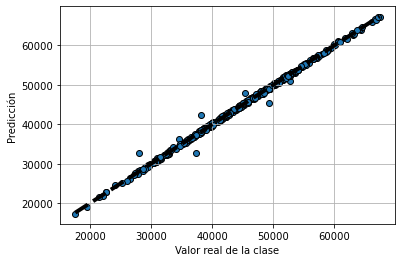

In [23]:
# Crear una función que dadas las variables "y" e "y_pred" se visualice la bisectriz
def plot_bisectriz_OLS(y, y_pred_OLS):
    fig, ax = plt.subplots()
    ax.scatter(y, y_pred_OLS, edgecolors=(0, 0, 0))
    ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
    ax.set_xlabel('Valor real de la clase')
    ax.set_ylabel('Predicción')
    plt.grid()
    plt.show()

# Visualiza la bisetriz
# Asi ver si el algoritmo funciona bien, si los puntos se mantienen sobre la linea diagonal.
plot_bisectriz_OLS(y_training, y_pred_OLS)

In [24]:
# 5.2) Entrenamiento del modelo definitivo con todos los datos para obtener los coeficientes del modelo.
model_OLS = reg_OLS.fit(X_stdr, y_training)

# Obtención de los coeficientes del modelo.
# Tiene que haber 1 por cada atributo, en este caso 13
w = model_OLS.coef_
print('Model coeficients: \n', w)

# Obtención del término independiente del modelo.
w_0 = model_OLS.intercept_
print('\nTérmino independiente: ', w_0)

Model coeficients: 
 [6373.89759646 6101.42628952 4942.00246506]

Término independiente:  43772.87065956522


#### 2. Regresión KNN

In [28]:
# 5) Construcción del algoritmo de aprendizaje.

# Vamos a obtener el mejor modelado posible con GridSearchCV
from sklearn.model_selection import GridSearchCV

# Definir parámetros de búsqueda
parameters = {'n_neighbors': range(1,10),  # Va a probar hasta k = 10 vecinos
             'weights': ('uniform', 'distance'), 
             'metric': ('manhattan', 'euclidean'),
             'algorithm': ('ball_tree', 'kd_tree', 'auto')}

# Aplicar el algoritmo de búsqueda
reg = KNeighborsRegressor()
model = GridSearchCV(reg, parameters, scoring='r2')

# Entrenar el modelo
model.fit(X_stdr, y_training)

# Extraer los mejores parámetros
model.best_params_
print(model.best_params_)

# Establecer el número de vecinos (k)
k = model.best_params_['n_neighbors'] 

# Crear el algoritmo
reg_KNN = KNeighborsRegressor(n_neighbors=k, algorithm=model.best_params_['algorithm'], weights=model.best_params_['weights'], metric=model.best_params_['metric'])

{'algorithm': 'ball_tree', 'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}


In [29]:
# 5.1) Validación cruzada interna para optimizar los hiperparámetros de los algoritmos (si procede)
# Validación, entrenamiento y evaluación del algoritmo de aprendizaje.
# en "cv = KFold(n_splits=5)" estamos haciendo un cross-validation INTERNO!
# KFold es el que hace las particiones
# El cross_val_score le paso el x_train e y_train, donde tengo el 80% de los datos
# Ese 80% lo separa en k=5 particiones y cada una de ellas lo divide entre 64% y 16%
# Esto devuelve el error absoluto promedio en regresión
results = cross_val_score(reg_KNN, X_stdr, y_training, cv = KFold(n_splits=5, shuffle=True, random_state=42))
print("Resultados por bolsa: ", results)
print("Error absoluto medio (media +/- desv.): %0.4f +/- %0.4f" % (results.mean(), results.std()))

Resultados por bolsa:  [0.96857686 0.95754478 0.96622646 0.95991861 0.97138111]
Error absoluto medio (media +/- desv.): 0.9647 +/- 0.0052


In [30]:
# Extraer métricas MAE, MSE, RMSE, MAPE y R2
metrics_cv_results_KNN = cross_validate(reg_KNN, X_stdr, y_training, cv=KFold(n_splits=5, shuffle=True, random_state=42), scoring=metricas)
pprint(metrics_cv_results_KNN)

{'fit_time': array([0.        , 0.        , 0.        , 0.        , 0.00801992]),
 'score_time': array([0.01601458, 0.0159843 , 0.00799513, 0.        , 0.        ]),
 'test_MAE': array([-1171.97339293, -1484.89626534, -1386.14005266, -1329.26339902,
       -1203.14599129]),
 'test_MAPE': array([-2.61750879, -3.97388616, -3.61515595, -3.74118876, -2.86918038]),
 'test_MSE': array([-2432867.28168216, -4154633.26511088, -3431891.74297193,
       -3699925.72840325, -2572985.16444593]),
 'test_R2': array([0.96857686, 0.95754478, 0.96622646, 0.95991861, 0.97138111]),
 'test_RMSE': array([-1559.76513671, -2038.29175172, -1852.53656994, -1923.51910009,
       -1604.05273119])}


In [31]:
# Extraer las predicciones del cross validation
y_pred_KNN = cross_val_predict(reg_KNN, X_stdr, y_training, cv=KFold(n_splits=5, shuffle=True, random_state=42))
print(y_pred_KNN) #Predicciones de las 5 bolsas (la y) concatenadas

[40735.18198782 45740.99767827 51815.26221949 43609.64205989
 43887.30994745 40547.59719416 43784.44623396 52651.15870275
 61023.0126372  39653.94093086 52021.79761624 59011.2295174
 51054.55516426 53191.58551657 42427.1919121  45569.70016422
 43666.2818131  48849.9762544  39295.94715805 39267.58704376
 59471.37719452 40550.55129894 42657.09318742 41608.89239269
 25179.94533997 55031.38136064 50926.23629733 47826.46578182
 40349.1526666  64025.44785229 33432.73190963 56388.74350826
 41170.19940778 44556.20418143 48527.86406352 40145.49262671
 63848.89454328 39152.95650374 50625.54101973 60138.9848245
 48019.95211753 33046.9806731  52452.03415821 40489.94417372
 48131.75208194 45466.34648281 47351.25406741 31894.0836309
 43389.36840483 44009.10535434 28253.18789137 52545.86372956
 62202.84958641 28121.4923795  45341.30888134 50568.80299784
 31245.38294208 47396.33624246 33381.49779619 46901.95372958
 48415.87547503 63990.0965781  33769.50303156 43871.62348784
 40434.15577241 36901.28955

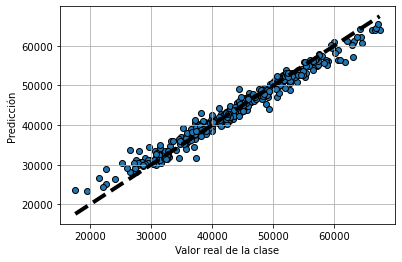

In [32]:
# Crear una función que dadas las variables "y" e "y_pred" se visualice la bisectriz
def plot_bisectriz_KNN(y, y_pred_KNN):
    fig, ax = plt.subplots()
    ax.scatter(y, y_pred_KNN, edgecolors=(0, 0, 0))
    ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
    ax.set_xlabel('Valor real de la clase')
    ax.set_ylabel('Predicción')
    plt.grid()
    plt.show()

# Visualiza la bisetriz
# Asi ver si el algoritmo funciona bien, si los puntos se mantienen sobre la linea diagonal.
plot_bisectriz_KNN(y_training, y_pred_KNN)

In [33]:
# 5.2) Entrenamiento del modelo definitivo
model_KNN = reg_KNN.fit(X_stdr, y_training)

### 6-10) PREDICCIÓN
Hacemos lo mismo que en el training practicamente.

In [34]:
# 6) Extracción de las características de test (Esto se aplica en imagen)
# 7) Selección de los atributos de test 
# Nos quedamos solo con los atributos que nos aportan, en este caso Age, Annual Salary y Net Worth
X_testing = X_testing.drop(["Gender", "Credit Card Debt"], axis=1)
print(X_testing)

      Age  Annual Salary    Net Worth
244  46.0    77146.27598  418764.5061
34   46.0    65311.68225  215673.5384
46   42.0    56098.50773  320228.6451
241  48.0    56118.39601  586717.4715
136  49.0    56895.23153  580950.3967
..    ...            ...          ...
24   40.0    69612.01230  499086.3442
387  42.0    71371.92544  321431.2790
53   37.0    72471.81532  583523.0762
184  57.0    68782.15718  350157.8394
376  32.0    64874.03368  528087.5277

[93 rows x 3 columns]


In [35]:
# 8) Estandarización de las característiacs de test
# aqui SOLO TRANSFROM
X_test_stdr = standardizer.transform(X_testing)

#### 1. Regresión OLS

In [36]:
# 9) Predicción del conjunto de test
y_pred_test_OLS = model_OLS.predict(X_test_stdr)
print(y_pred_test_OLS)

[52145.14842045 39570.36963156 34039.71908511 46767.96381938
 47875.69831757 60763.55748889 29706.81605147 41950.86126982
 64392.00691213 19360.76701574 41576.14412558 45948.59287799
 39333.22858466 53355.37451177 44620.61918667 50089.46876046
 38470.09592596 60030.44663733 57367.3630884  35489.85703805
 49982.66053997 51416.47311103 67139.75909842 60644.17341592
 44856.6517273  48817.78402858 61111.81104483 38344.45250751
 54926.86552544 37903.51105194 38656.68897013 56356.51740605
 41190.07525732 29270.29571361 35254.39563858 23397.05336552
 39899.89183531 23031.95443511 46276.20255662 35638.64659271
 59920.33251521 41854.52945519 39082.24923361 46056.42885493
 41080.36421951 38503.50997807 55252.49146136 44775.44429931
 33823.26148674 53229.74744155 48580.41928488 42537.50530932
 46906.27290579 43244.92072771 36754.67996497 60488.47911115
 41504.20182918 36280.86200251 53049.09679623 48277.20352745
 41448.29733664 42327.93550844 42076.0902232  43718.42790915
 52733.37175353 48191.57

MAE:  346.5250
MSE: 1166968.7550
RMSE: 1080.2633
MAPE: 0.0093
R2:   0.9876


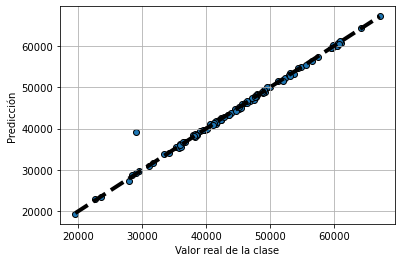

In [37]:
# 10) Evaluación del modelo sobre el conjunto de test (lo puedo hacer SOLO cuando conozca las etiquetas del test)
# MAE, MSE, RMSE, MAPE y R2
MAE = metrics.mean_absolute_error(y_testing, y_pred_test_OLS)
MSE = metrics.mean_squared_error(y_testing, y_pred_test_OLS, squared=True)
RMSE = metrics.mean_squared_error(y_testing, y_pred_test_OLS, squared=False)
MAPE = metrics.mean_absolute_percentage_error(y_testing, y_pred_test_OLS)
R2 = metrics.r2_score(y_testing, y_pred_test_OLS) # Le paso las etiquetas del test que tengo

print('MAE:  %.4f' % MAE)
print('MSE: %.4f' % MSE)
print('RMSE: %.4f' % RMSE)
print('MAPE: %.4f' % MAPE)
print('R2:   %.4f' % R2)

# Guardamos en una variable los valores
resultados_metricas_OLS = [MAE, MSE, RMSE, MAPE, R2]

# Visualización de resultados
plot_bisectriz_OLS(y_testing, y_pred_test_OLS)


#### 2. Regresión KNN

In [38]:
# 9) Predicción del conjunto de test
y_pred_test_KNN = model_KNN.predict(X_test_stdr)
print(y_pred_test_KNN)

[53022.06003991 40513.64337095 34601.58036058 47911.59790653
 49228.95902765 57253.06309388 31449.00518039 41676.71831162
 62808.85265429 23466.79865589 41409.45123921 45730.88944412
 38843.779402   52000.38433329 41987.16660632 51302.63478907
 39667.62624125 54882.86406549 51721.83877505 36993.35289862
 53398.14548672 49437.83388304 61491.71554396 59718.88755412
 45464.02431326 48885.21276297 60692.60139731 38690.10587505
 53393.09980172 36521.84524358 39196.4485982  56223.5357116
 43014.36890091 29918.99505768 36140.24903413 22424.7294141
 39181.43347998 24212.69189708 45584.78940748 35591.0641108
 58155.54226698 42029.69833665 40565.17760459 45953.49004396
 40821.51069218 37971.7724841  53335.52956738 43796.67560756
 33576.13123568 53112.05283293 49042.05887461 43282.57507859
 46754.37286605 42150.94392697 36608.83517999 57304.54156971
 41670.3047153  37650.40640594 52221.15787383 48168.81293298
 44765.43325843 41312.14068049 42520.48005739 43112.86803058
 52534.31681322 49221.25830

MAE:  1333.1952
MSE: 4659565.2197
RMSE: 2158.6026
MAPE: 0.0325
R2:   0.9506


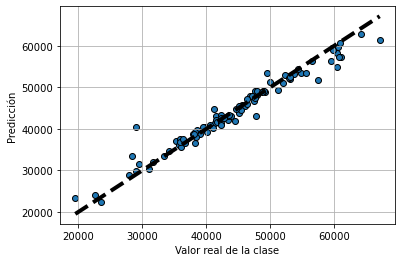

In [39]:
# 10) Evaluación del modelo sobre el conjunto de test (lo puedo hacer SOLO cuando conozca las etiquetas del test)
MAE = metrics.mean_absolute_error(y_testing, y_pred_test_KNN)
MSE = metrics.mean_squared_error(y_testing, y_pred_test_KNN, squared=True)
RMSE = metrics.mean_squared_error(y_testing, y_pred_test_KNN, squared=False)
MAPE = metrics.mean_absolute_percentage_error(y_testing, y_pred_test_KNN)
R2 = metrics.r2_score(y_testing, y_pred_test_KNN) # Le paso las etiquetas del test que tengo

print('MAE:  %.4f' % MAE)
print('MSE: %.4f' % MSE)
print('RMSE: %.4f' % RMSE)
print('MAPE: %.4f' % MAPE)
print('R2:   %.4f' % R2)

# Guardamos en una variable los valores
resultados_metricas_KNN = [MAE, MSE, RMSE, MAPE, R2]

# Visualización de resultados
plot_bisectriz_KNN(y_testing, y_pred_test_KNN)

### Breve discusión comparando los resultados obtenidos con cada método.

Vamos a proceder ahora  a realizar una breve comparación de ambos modelos. Para ello vamos a tener en cuenta métricas de evaluación absolutas como el MAE, MSE y RMSE; y métricas de evaluación relativas como el MAPE y R2.

In [40]:
# Definimos los nombres de las métricas
metricas_nombres = ['MAE', 'MSE', 'RMSE', 'MAPE', 'R2']
print(f'OLS: {resultados_metricas_OLS}')
print(f'KNN: {resultados_metricas_KNN}')

# Creamos una tabla comparativa de las diferentes métricas
pred_y_table = pd.DataFrame({"":metricas_nombres,"OLS":resultados_metricas_OLS,"KNN":resultados_metricas_KNN})
pred_y_table = pred_y_table.T
pred_y_table

OLS: [346.52503459052934, 1166968.7550452463, 1080.263280429936, 0.009332603139246774, 0.9876374517608795]
KNN: [1333.1952295737658, 4659565.2197059635, 2158.6026081022796, 0.032518954889648816, 0.950637838799969]


,0,1,2,3,4
,MAE,MSE,RMSE,MAPE,R2
OLS,346.525035,1166968.755045,1080.26328,0.009333,0.987637
KNN,1333.19523,4659565.219706,2158.602608,0.032519,0.950638


Para facilitar la comprensión del lector, vamos a representar gráficamente la comparación de nuestro modelo OLS y KNN para cada una de las gráficas citadas anteriormente.

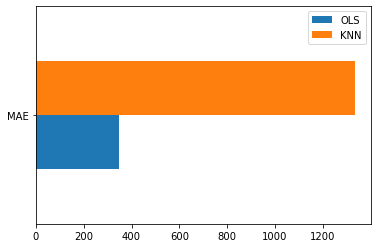

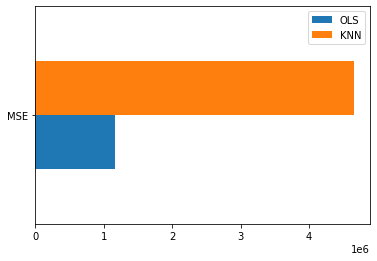

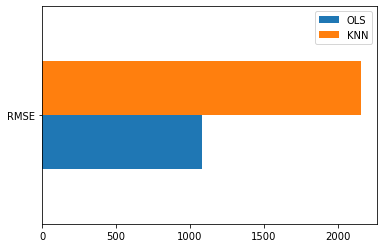

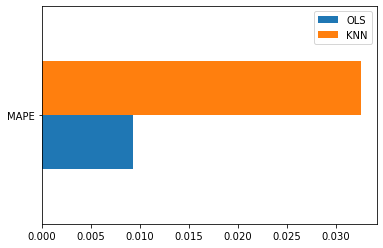

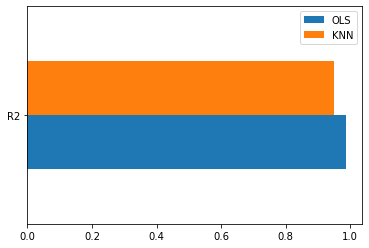

In [41]:
# Visualizamos una gráfica por cada métrica calculada
for i in range(len(metricas_nombres)):    
    df = pd.DataFrame({'OLS': resultados_metricas_OLS[i],
                       'KNN': resultados_metricas_KNN[i]}, index=[metricas_nombres[i]])
    ax = df.plot.barh()

Como podemos observar en todas las gráficas, el modelo OLS se comporta y predice mejor que el modelo KNN:

* En las gráficas de medidas absolutas (MAE,RMSE,MSE), que miden las diferencias entre las predicciones y los valores reales, vemos que el modelo KNN tiene siempre un valor muy por encima de nuestro modelo OLS, evidenciando una mayor cantidad de errores.

* En cuanto a las gráficas de medidas relativas, MAPE y R2, podemos observar que en la primera de ellas el modelo OLS tiene un valor significativamente menor, mientras que en la segunda, a pesar de estar más igualado, el modelo OLS tiene un valor mayor al del modelo KNN. Esto no hace más que confirmar nuestra elección de modelo, ya que el MAPE también mide la diferencia entre predicciones y valores reales (por lo que un menor valor indica un mejor modelo) y la métrica R2 o coeficiente de determinación es la proporción de la varianza total de la variable explicada por la regresión, por lo que un valor mayor se correspondería con un mejor modelo. (El coeficiente de determinación toma valores entre 0 y 1, por lo que nuestra puntuación de 0.987637 es considerablemente buena).


Por todo lo mencionado anteriormente, concluímos que el mejor modelo sería nuestro modelo OLS.
